Bueno, necestimaos hacer exploración, y limpieza de datos si es necesario.
En nuestro caso, debemos solo separar nuestras fotos por clase.

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import shutil
import re
from PIL import Image
import glob

In [ ]:
#Bueno, primero veamos si tenemos una  base de datos limpia.

folder_path = r"C:\Users\think\Documents\GitRepos\FP_TSAF-2024\WeatherDataSetOG\dataset2"

# Aqui vamos a guardar las extensiones de los archivos
file_extensions = set()

# Un loop 
for filename in os.listdir(folder_path):
    # extension
    _, extension = os.path.splitext(filename)
    if extension:  # si la extension no es vacia entonces la guardamos
        file_extensions.add(extension.lower())

# Vemos que extensiones hay
print("Found file extensions:", file_extensions)


In [ ]:
#Solo queria ver si las imagenes jpeg eran presentbales.
folder_path = r"C:\Users\think\Documents\GitRepos\FP_TSAF-2024\WeatherDataSetOG\dataset2"

for filename in os.listdir(folder_path):
    if filename.lower().endswith('.jpeg'):
        file_path = os.path.join(folder_path, filename)
        img = Image.open(file_path)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')  
        plt.show()  


In [ ]:
#Esta rutina debe de organizar las imagenes en carpetas segun el clima que representan.
#Usando REGEX para extraer el clima de la imagen.
def extract_weather(filename):
    match = re.search(r"([a-zA-Z]+)\d*\.jpg", filename)
    if match:
        return match.group(1)
    else:
        return None

# Donde estan las imagenes.
folder_path = r"C:\Users\think\Documents\GitRepos\FP_TSAF-2024\WeatherDataSetOG\dataset2"

# Donde vamos a crear el folder que contendra los subfolders
main_folder_base_path = r"C:\Users\think\Documents\GitRepos\FP_TSAF-2024"

# Nombre del folder
main_folder_name = "WeatherDataSet_Organized"

# Creamos el folder
main_folder_path = os.path.join(main_folder_base_path, main_folder_name)
if not os.path.exists(main_folder_path):
    os.mkdir(main_folder_path)

# Checamos las clases
main_folders = set()
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        weather = extract_weather(filename)
        if weather:
            main_folders.add(weather)
            if len(main_folders) > 4:
                print("More than 4 main folders created. Breaking the code.") #Por si hacia muchas clases
                break

# Creand los folders de las clases 
for main_folder in main_folders:
    if not os.path.exists(os.path.join(main_folder_path, main_folder)):
        os.mkdir(os.path.join(main_folder_path, main_folder))

# Llenamos los folders
for filename in os.listdir(folder_path):
    if filename.endswith(".jpeg"):
        # Convertimos de jpeg a jpg en lugar de desperdiciar las imagenes
        source_file = os.path.join(folder_path, filename)
        destination_file = os.path.join(folder_path, filename[:-5] + ".jpg")  
        os.rename(source_file, destination_file)
        filename = filename[:-5] + ".jpg"  # Update  to .jpg
    if filename.endswith(".jpg"):
        weather = extract_weather(filename)
        if weather in main_folders:
            source_file = os.path.join(folder_path, filename)
            destination_folder = os.path.join(main_folder_path, weather, filename)
            shutil.move(source_file, destination_folder)

In [1]:
#Todos los comentarios fueron hechos una vez que se habia acabado 
#el analisis en Colab, y una de las estrategias que tome fue encontrar el 
#tamañao de imagen más común para que la red convolucional 
#pudiera tener una visión más clara de las imagenes, y asi incrementar su presición.

# Image Shape
def get_image_shape(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# te veo, te analizo y te admiro
def analyze_subfolder(subfolder_path):
    shapes = set()
    num_images = 0
    for filename in os.listdir(subfolder_path):
        if filename.endswith(".jpg"):
            num_images += 1
            image_path = os.path.join(subfolder_path, filename)
            shape = get_image_shape(image_path)
            if shape:
                shapes.add(shape)
    return num_images, shapes

#en donde están los folders
parent_folder = r"C:\Users\think\Documents\GitRepos\FP_TSAF-2024\WeatherDataSet_Organized"

for subfolder in os.listdir(parent_folder):
    subfolder_path = os.path.join(parent_folder, subfolder)
    if os.path.isdir(subfolder_path):
        num_images, shapes = analyze_subfolder(subfolder_path)
        print(f"Subfolder: {subfolder}")
        print(f"Number of images: {num_images}")
        print(f"Shapes: {shapes}")

Subfolder: cloudy
Number of images: 300
Shapes: {(255, 192), (229, 173), (252, 168), (1024, 675), (297, 167), (1280, 720), (291, 169), (225, 178), (300, 300), (615, 409), (312, 164), (768, 508), (206, 155), (241, 177), (500, 309), (287, 192), (250, 152), (207, 156), (259, 194), (233, 175), (282, 159), (1000, 750), (268, 178), (260, 174), (254, 170), (267, 189), (272, 185), (700, 421), (298, 185), (800, 377), (500, 329), (270, 178), (284, 177), (261, 175), (281, 187), (299, 168), (238, 158), (290, 174), (600, 254), (520, 362), (278, 157), (229, 152), (247, 252), (241, 181), (600, 400), (260, 194), (251, 167), (270, 180), (317, 167), (285, 171), (222, 167), (272, 153), (203, 163), (231, 154), (318, 159), (263, 168), (243, 162), (350, 200), (206, 152), (223, 168), (205, 154), (342, 171), (264, 178), (226, 170), (800, 500), (205, 300), (275, 172), (1920, 1080), (590, 400), (851, 377), (247, 165), (1024, 576), (720, 476), (272, 182), (213, 160), (303, 160), (224, 224), (276, 173), (271, 186

In [ ]:
#Papi, ocupaba una manera de ver cuantas imagenes habia en cada carpeta
#y asi ponerlo en la presentación.
def count_files_in_subfolders(main_folder_path, subfolders):
    counts = []
    for folder in subfolders:
        folder_path = os.path.join(main_folder_path, folder)
        files = glob.glob(os.path.join(folder_path, '*.jpg'))
        counts.append(len(files))
    return counts

def plot_distribution(subfolders, counts):
    plt.figure(figsize=(10, 6))
    plt.bar(subfolders, counts)
    plt.xlabel('Subfolders')
    plt.ylabel('Number of .jpg files')
    plt.title('Distribution of .jpg files in subfolders')
    plt.show()

    
def main(main_folder_path, subfolders):
    counts = count_files_in_subfolders(main_folder_path, subfolders)
    plot_distribution(subfolders, counts)


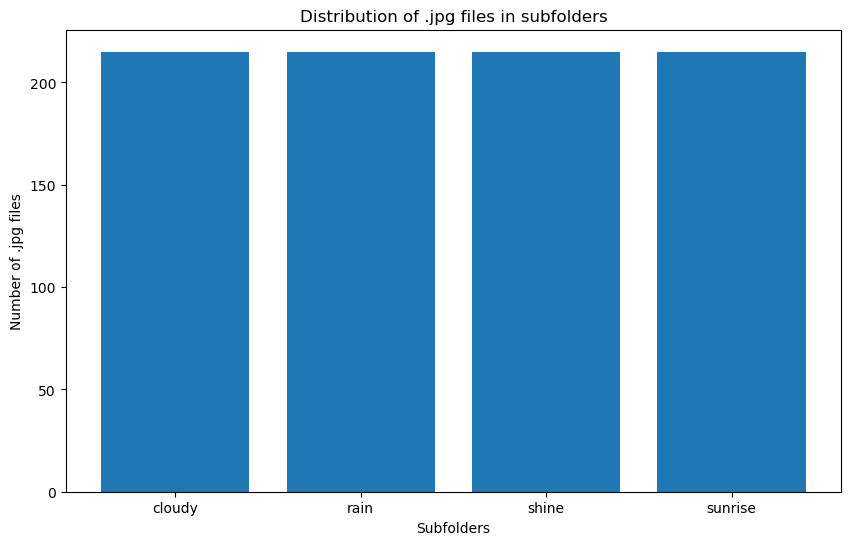

In [35]:
if __name__ == "__main__":
    main_folder_path = r'C:\Users\think\Documents\GitRepos\FP_TSAF-2024\WeatherDataSet_Balanced'
    subfolders = ['cloudy', 'rain', 'shine', 'sunrise']
    main(main_folder_path, subfolders)

In [32]:
import os
import random
import shutil
import tensorflow as tf
from PIL import Image

# Set a seed for reproducibility
seed = 42
tf.random.set_seed(seed)
random.seed(seed)

# Function to get the shape of an image
def get_image_shape(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Function to count images and determine shapes in a subfolder
def analyze_subfolder(subfolder_path):
    shapes = set()
    num_images = 0
    images = []
    for filename in os.listdir(subfolder_path):
        if filename.endswith(".jpg"):
            num_images += 1
            image_path = os.path.join(subfolder_path, filename)
            shape = get_image_shape(image_path)
            if shape:
                shapes.add(shape)
                images.append(image_path)
    return num_images, shapes, images

# Path to the folder containing subfolders
parent_folder = r"C:\Users\think\Documents\GitRepos\FP_TSAF-2024\WeatherDataSet_Organized copy"

# Path to the new balanced dataset folder
balanced_folder = r"C:\Users\think\Documents\GitRepos\FP_TSAF-2024\WeatherDataSet_Balanced"

# Create the balanced dataset folder if it doesn't exist
os.makedirs(balanced_folder, exist_ok=True)

# Analyze each subfolder
subfolder_info = {}
for subfolder in os.listdir(parent_folder):
    subfolder_path = os.path.join(parent_folder, subfolder)
    if os.path.isdir(subfolder_path):
        num_images, shapes, images = analyze_subfolder(subfolder_path)
        subfolder_info[subfolder] = {
            "num_images": num_images,
            "shapes": shapes,
            "images": images,
            "path": subfolder_path
        }
        print(f"Subfolder: {subfolder}")
        print(f"Number of images: {num_images}")
        print(f"Shapes: {shapes}")

# Determine the minimum number of images in any subfolder
min_num_images = min(info["num_images"] for info in subfolder_info.values())

# Fill up each subfolder in the balanced dataset folder with random images until they reach the minimum number
for subfolder, info in subfolder_info.items():
    # Create corresponding subfolder in the balanced dataset folder
    balanced_subfolder_path = os.path.join(balanced_folder, subfolder)
    os.makedirs(balanced_subfolder_path, exist_ok=True)
    
    # Add random copies to the balanced subfolder until it reaches the minimum number of images
    for i in range(215):
        random_index = i % len(info["images"])  # Ensures cycling through images if needed
        random_image = info["images"][random_index]
        new_image_name = f"{os.path.basename(random_image)}"
        new_image_path = os.path.join(balanced_subfolder_path, new_image_name)
        shutil.copy(random_image, new_image_path)
    
    print(f"Subfolder {subfolder} in balanced dataset has been filled up to {min_num_images} images.")



Subfolder: cloudy
Number of images: 300
Shapes: {(255, 192), (229, 173), (252, 168), (1024, 675), (297, 167), (1280, 720), (291, 169), (225, 178), (300, 300), (615, 409), (312, 164), (768, 508), (206, 155), (241, 177), (500, 309), (287, 192), (250, 152), (207, 156), (259, 194), (233, 175), (282, 159), (1000, 750), (268, 178), (260, 174), (254, 170), (267, 189), (272, 185), (700, 421), (298, 185), (800, 377), (500, 329), (270, 178), (284, 177), (261, 175), (281, 187), (299, 168), (238, 158), (290, 174), (600, 254), (520, 362), (278, 157), (229, 152), (247, 252), (241, 181), (600, 400), (260, 194), (251, 167), (270, 180), (317, 167), (285, 171), (222, 167), (272, 153), (203, 163), (231, 154), (318, 159), (263, 168), (243, 162), (350, 200), (206, 152), (223, 168), (205, 154), (342, 171), (264, 178), (226, 170), (800, 500), (205, 300), (275, 172), (1920, 1080), (590, 400), (851, 377), (247, 165), (1024, 576), (720, 476), (272, 182), (213, 160), (303, 160), (224, 224), (276, 173), (271, 186

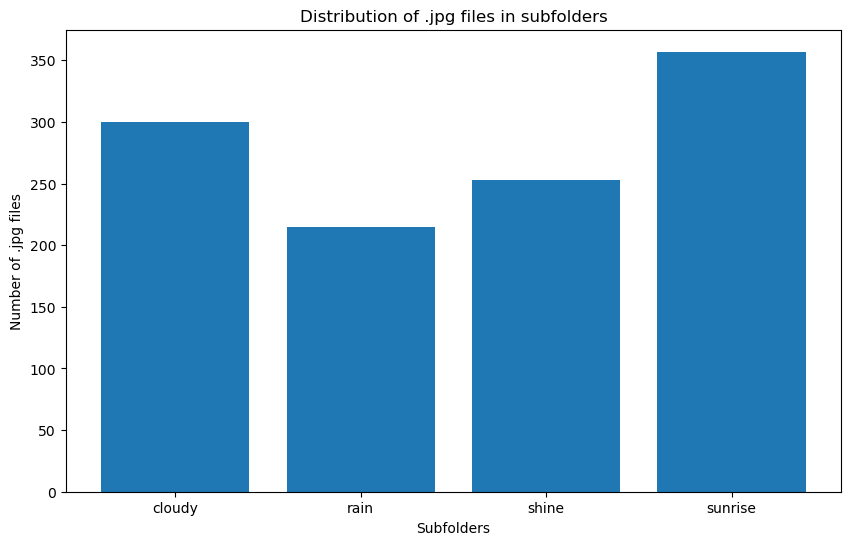

In [34]:
if __name__ == "__main__":
    main_folder_path = r'C:\Users\think\Documents\GitRepos\FP_TSAF-2024\WeatherDataSet_Organized'
    subfolders = ['cloudy', 'rain', 'shine', 'sunrise']
    main(main_folder_path, subfolders)
